# Exploratory Data Analysis

## Setup

In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import numpy as np
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5)
from sklearn.preprocessing import OrdinalEncoder
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Common imports

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Reference- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# saving the figures; method can be used later
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Wrangling

In [2]:
data = pd.read_csv("student-por.csv")  # reading the csv file with the data

print(data.shape)  # to understand the dimensions of the dataset
# to display the number of rows/instances
print("rows = {}".format(data.shape[0]))
# to display the number of columns/attributes
print("columns = {}".format(data.shape[1]))

(649, 33)
rows = 649
columns = 33


In [3]:
data.head(10)  # to get a glimpse of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [4]:
data.tail(10)  # to get a glimpse of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
639,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
640,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0
641,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,0,14,17,15
642,MS,F,17,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0,6,9,11
643,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,4,7,9,10
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [5]:
data.sample()  # returns a sample random row from the data frame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
148,GP,F,15,R,GT3,T,1,1,other,other,...,5,5,5,1,1,1,2,8,9,9


In [6]:
data.info()  # to understand the attributes and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
data.describe(
)  # to view a summary of the descriptive statistics of the numerical attributes in the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Cleaning Data

In [8]:
data.isnull().sum().sum()  # to check for any null values in the dataset

0

In [9]:
data.duplicated().describe(
)  # one unique value of false means no duplicate value

count       649
unique        1
top       False
freq        649
dtype: object

In [10]:
# data.drop_duplicates() # we do not have duplicate values in our dataset as proved above

# Drops rows with null or missing values # we do not have null values
data.dropna()  # dropping missing values, if present in dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [11]:
data.rename(columns={
    'famsize': 'fam_size',
    'Pstatus': 'parent_status',
    'Medu': 'mom_edu',
    'Fedu': 'dad_edu',
    'Mjob': 'mom_job',
    'Fjob': 'dad_job',
    'schoolsup': 'school_support',
    'famsup': 'fam_support',
    'paid': 'paid_class',
    'higher': 'higher_edu',
    'romantic': 'romantic_relations',
    'famrel': 'fam_relations',
    'goout': 'outings',
    'Dalc': 'workday_alcohol',
    'Walc': 'weekend_alcohol'
},
            inplace=True)
# renaming the data columns

### Checking for Outliers or Invalid Data
#### Note: These attributes- mom_edu, dad_edu, traveltime, studytime, famrelations, freetime, outings, workday_alcohol, weekend_alcohol, and health are ordinal data but have been converted to numeric for analysis purposes. We are not checking for outliers but just for invalid values for these attributes. Ordinal values ranging from 1-5 are very low-very high.

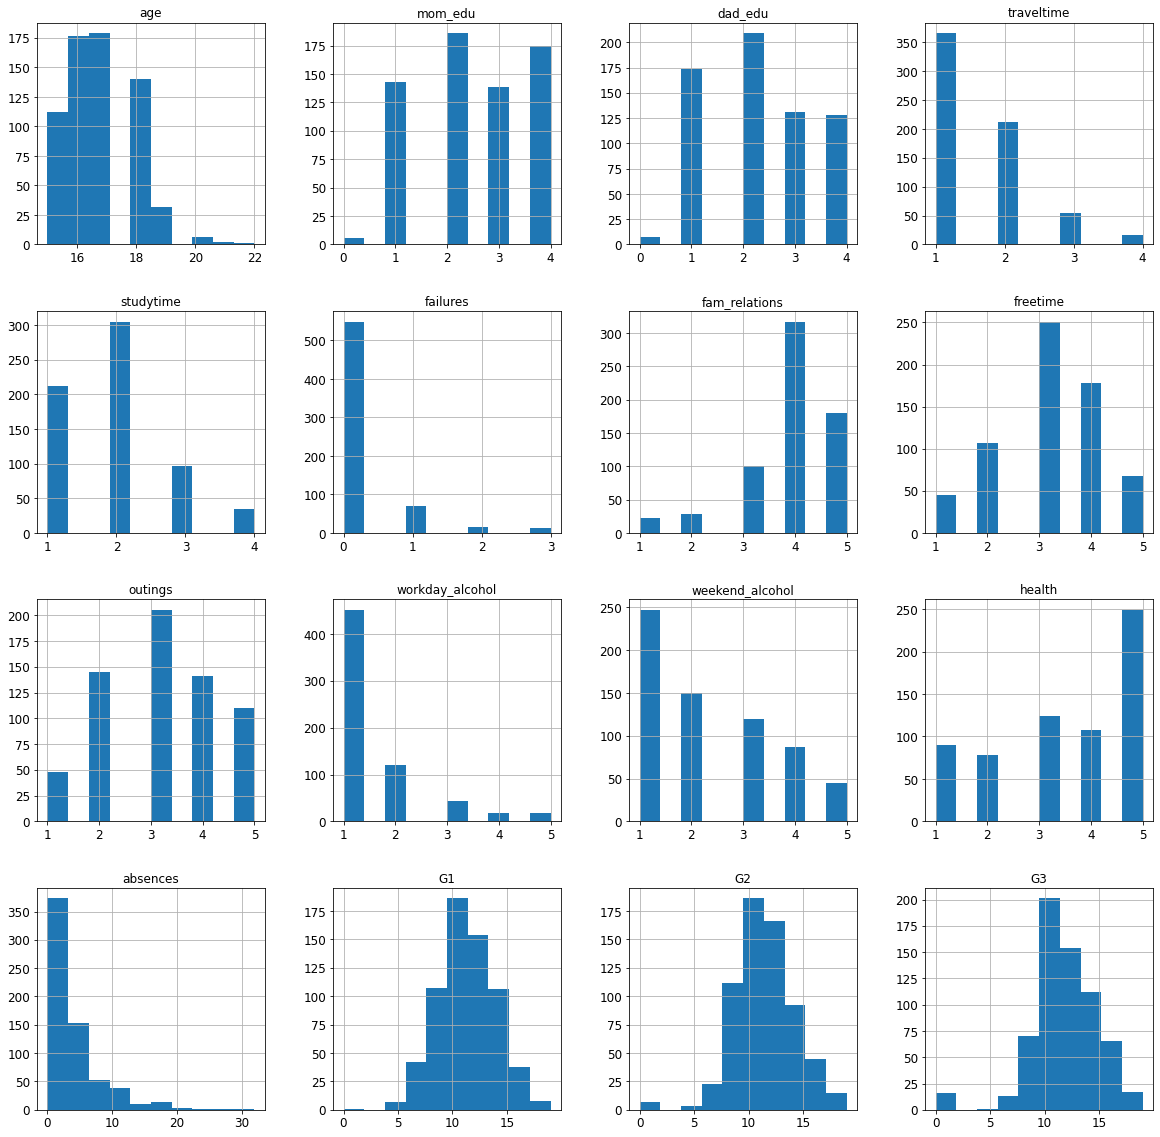

In [12]:
# To plot a histogram for each numerical attribute, aids in checking for nonsensical extreme values (invalid values) in attributes that were converted from ordinal to numeric.
data.hist(figsize=(20, 20))
plt.show()

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
279     GP   M   22       U      GT3             T        3        1   

      mom_job   dad_job  ... fam_relations freetime  outings  workday_alcohol  \
279  services  services  ...             5        4        5                5   

     weekend_alcohol health absences G1 G2 G3  
279                5      1       12  7  8  5  

[1 rows x 33 columns]


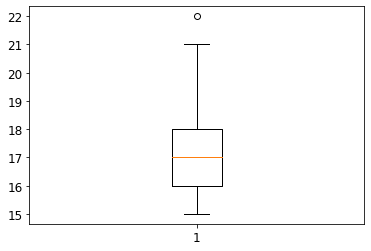

In [13]:
age_Q1 = data["age"].quantile(0.25)
age_Q3 = data["age"].quantile(0.75)
age_IQR = age_Q3 - age_Q1  # Computing IQR

# Data points below the lower fence (Q1-1.5*IQR) and above the upper fence (Q3+1.5*IQR) are considered to be outliers.
age_outliers = data[(data["age"] < (age_Q1 - 1.5 * age_IQR))
                    | (data["age"] > (age_Q3 + 1.5 * age_IQR))]

print(age_outliers)  # to check out the outliers

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR, removing outliers from the dataset
# data = data[(data["age"]>=(age_Q1 - 1.5 * age_IQR)) & (data["age"]<=(age_Q3 + 1.5 * age_IQR))]
# We do not want the filter the data as we would like to consider the only person of 22 years of age for possible interesting correlations.
# We might want to reconsider our decision at a later point if required.

# Creating boxplot, dots representing data above the upper fence or below the lower fence represent outliers
age_plot = plt.boxplot(data["age"])
plt.show(age_plot)

In [14]:
# Data points above mean + 3*std and below mean + 3*std are considered outliers
upper_G1 = data["G1"].mean() + 3 * data["G1"].std()
lower_G1 = data["G1"].mean() - 3 * data["G1"].std()
print(upper_G1)
print(lower_G1)
data_1 = data[(data["G1"] < upper_G1) & (data["G1"] > lower_G1)]
print(data_1.shape)

upper_G2 = data_1["G2"].mean() + 3 * data_1["G2"].std()
lower_G2 = data_1["G2"].mean() - 3 * data_1["G2"].std()
print(upper_G2)
print(lower_G2)
data_2 = data_1[(data_1["G2"] < upper_G2) & (data_1["G2"] > lower_G2)]
print(data_2.shape)

# Using z-scores to find outliers, all data points with z-score above 3 and below -3 are said to be outliers
data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()
print(data_2[data_2["zscore"] > 3].shape)
# 9 values so they have been removed
print(data_2[data_2["zscore"] < -3].shape)

# new dataframe with no outliers
data_3 = data_2[(data_2['zscore'] > -3) & (data_2['zscore'] < 3)]

19.63487088610952
3.1632801154313093
(648, 33)
20.318397172480005
2.8235781361619683
(641, 33)
(0, 34)
(9, 34)


C:\Users\geeta\AppData\Local\Temp\ipykernel_17548\3805946291.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['zscore'] = (data_2["G3"] - data_2["G3"].mean()) / data_2["G3"].std()


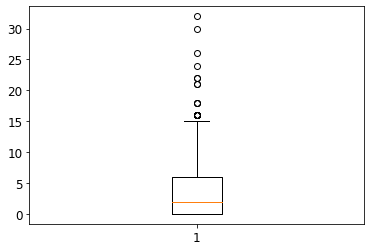

    school sex  age address fam_size parent_status  mom_edu  dad_edu  \
40      GP   F   16       U      LE3             T        2        2   
103     GP   F   15       U      GT3             T        3        2   
150     GP   F   15       U      GT3             A        3        3   
155     GP   M   17       U      GT3             T        2        1   
161     GP   M   16       U      GT3             T        4        4   
197     GP   F   17       U      LE3             T        3        3   
206     GP   M   17       U      GT3             T        1        2   
211     GP   M   16       R      LE3             T        3        3   
212     GP   F   17       U      GT3             T        4        4   
217     GP   F   17       R      GT3             T        2        2   
230     GP   F   17       U      GT3             T        4        3   
253     GP   F   18       U      LE3             A        2        4   
254     GP   F   18       U      LE3             T        2     

In [15]:
# Creating boxplots to check for outliers visually, dots representing data above the upper fence or below the lower fence represent outliers as explained already
absences_plot = plt.boxplot(data_3["absences"])
plt.show()

absences_Q1 = data_3["absences"].quantile(0.25)
absences_Q3 = data_3["absences"].quantile(0.75)
absences_IQR = absences_Q3 - absences_Q1  # Computing IQR

absences_outliers = data_3[(data_3["absences"] <
                           (absences_Q1 - 1.5 * absences_IQR))
                          | (data_3["absences"] >
                             (absences_Q3 + 1.5 * absences_IQR))]

print(absences_outliers)  # to check out the outliers

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR, making another dataset without outliers, to resuse outliers data in analysis if required
data4 = data_3[(data_3["absences"] >= (absences_Q1 - 1.5 * absences_IQR))
               & (data_3["absences"] <= (absences_Q3 + 1.5 * absences_IQR))]

In [16]:
print("For studytime")
# counts the occurences of values of each unique value in the column 'studytime'
print(data4['studytime'].value_counts())
# counts the occurences of each unique value in the column 'studytime'
print(data4['studytime'].value_counts().count())

print("For freetime")
# counts the occurences of values of each unique value in the column 'freetime'
print(data4['freetime'].value_counts())
# counts the occurences of each unique value in the column 'freetime'
print(data4['freetime'].value_counts().count())

print("\nFor failures-")
# counts the occurences of values of each unique value in the column 'failures'
print(data4['failures'].value_counts())
# counts the occurences of each unique value in the column 'failures'
print(data4['failures'].value_counts().count())

For studytime
2    284
1    195
3     97
4     35
Name: studytime, dtype: int64
4
For freetime
3    233
4    170
2    102
5     61
1     45
Name: freetime, dtype: int64
5

For failures-
0    527
1     57
2     14
3     13
Name: failures, dtype: int64
4


In [17]:
# counts the occurences of values of each unique value in the column 'health'
print(data4['health'].value_counts())

# counts the occurences of values of each unique value in the column 'parent_status'- "T" - living together or "A" - apart
print(data4['parent_status'].value_counts())

5    234
3    115
4    104
1     85
2     73
Name: health, dtype: int64
T    540
A     71
Name: parent_status, dtype: int64


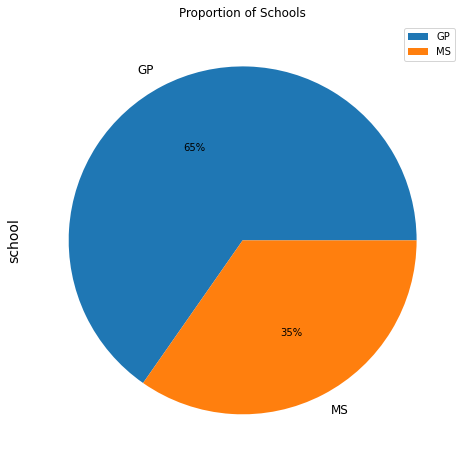

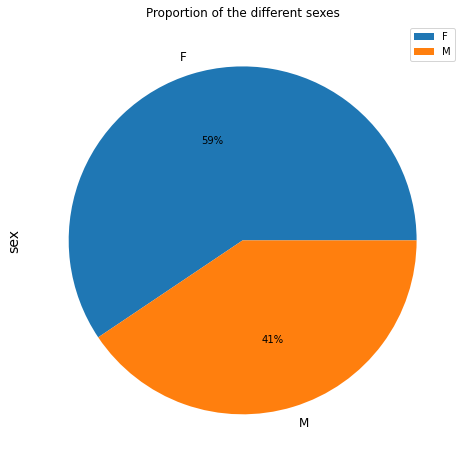

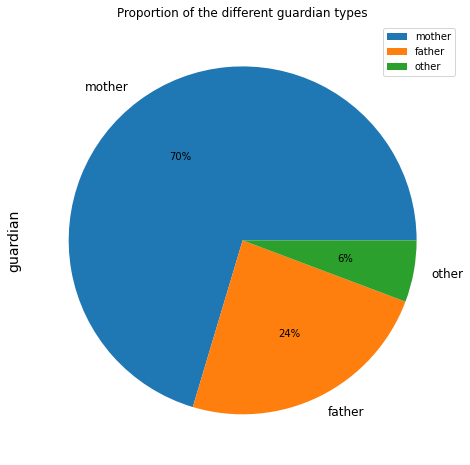

In [18]:
# Shows the proportion of schools mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10, 8))
data4.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of Schools')
plt.legend()

# Shows the proportion of sexes mentioned; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different sexes')
plt.legend()

# Shows the proportion of guardians types; to confirm that there are no invalid values
plt.figure(figsize=(10,8))
data4.guardian.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Proportion of the different guardian types')
plt.legend()

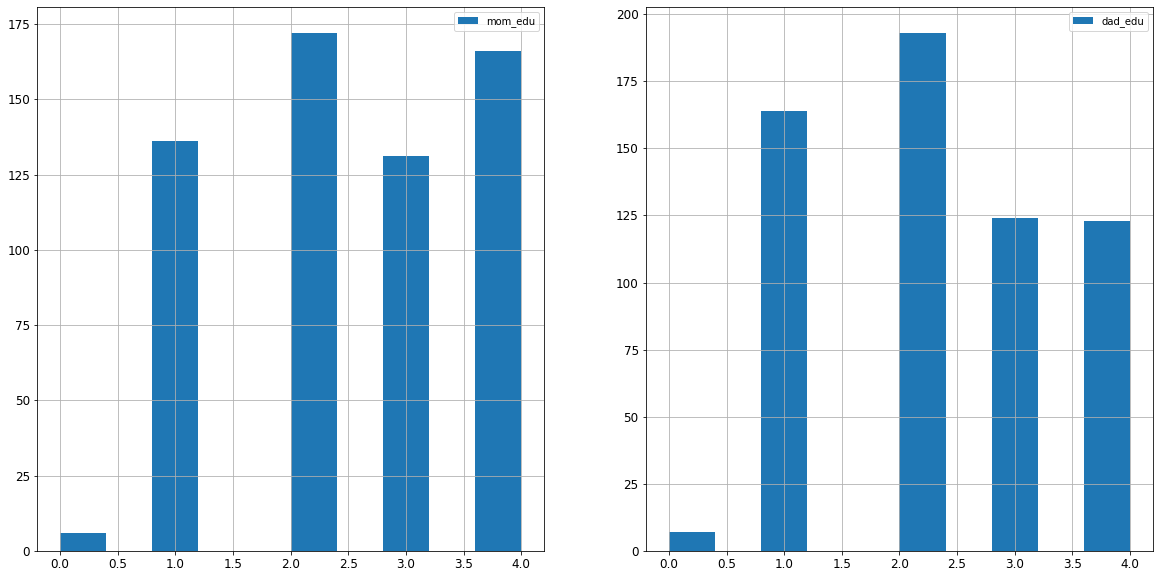

In [19]:
# To plot a histogram for visualizing and comparing mother's and father's education
fig, axes = plt.subplots(1, 2)
data4["mom_edu"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_edu"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

In [20]:
# counts the occurences of values of each unique value in the column 'mom_job'
data4['mom_job'].value_counts()
# counts the occurences of values of each unique value in the column 'dad_job'
data4['dad_job'].value_counts()

other       348
services    169
at_home      39
teacher      32
health       23
Name: dad_job, dtype: int64

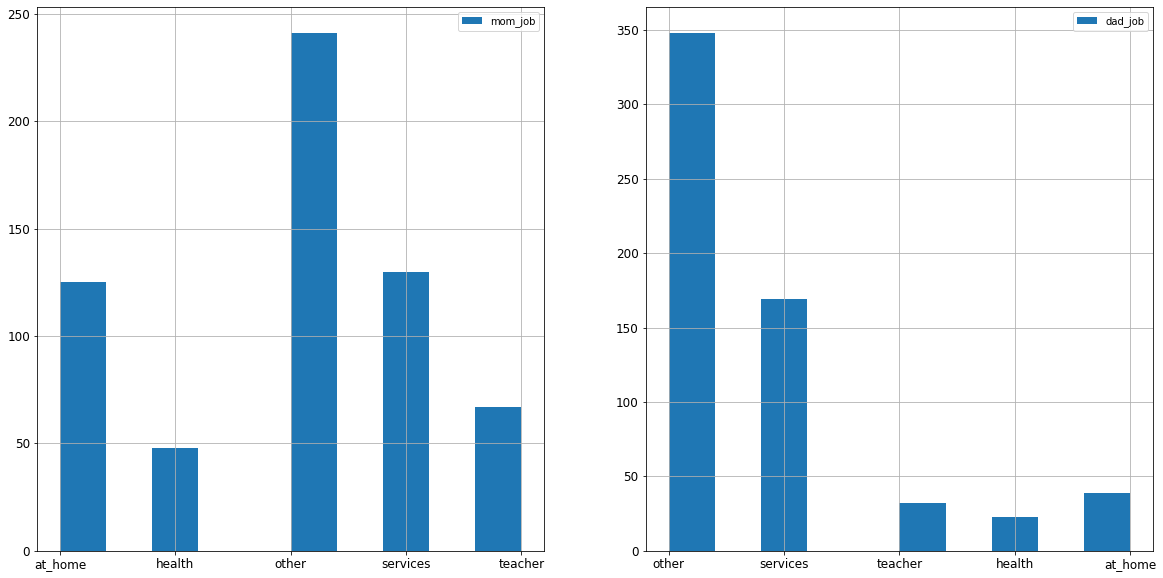

In [21]:
# To visualize the values of the mother's job and father's jobs
fig, axes = plt.subplots(1, 2)
data4["mom_job"].hist(legend='True', ax=axes[0], figsize=(20,10))
data4["dad_job"].hist(legend='True', ax=axes[1], figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='address'>

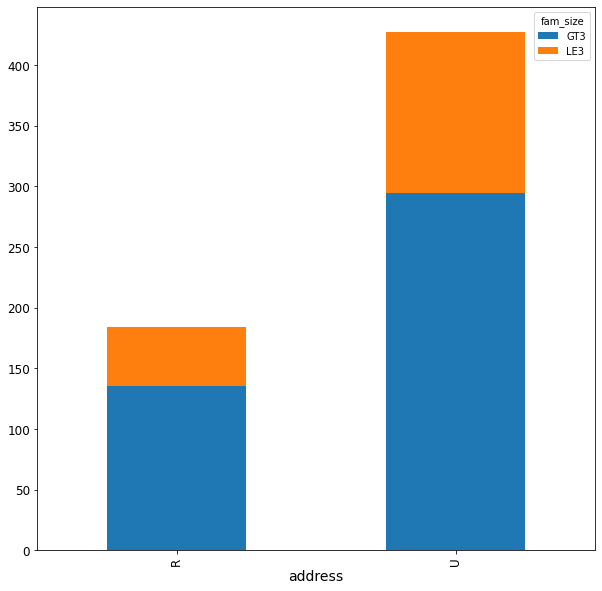

In [22]:
# Reference- https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data
# To visualize the relation between family size and the type of the address (urban(U) or rural(R))
pd.crosstab(data4['address'],data4['fam_size']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='fam_relations'>

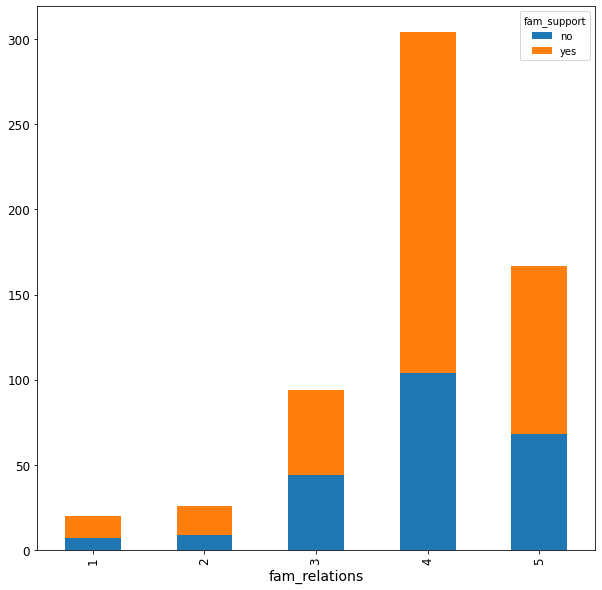

In [23]:
# To visualize the relation between level of family relation and the support from family
pd.crosstab(data4['fam_relations'],data4['fam_support']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='reason'>

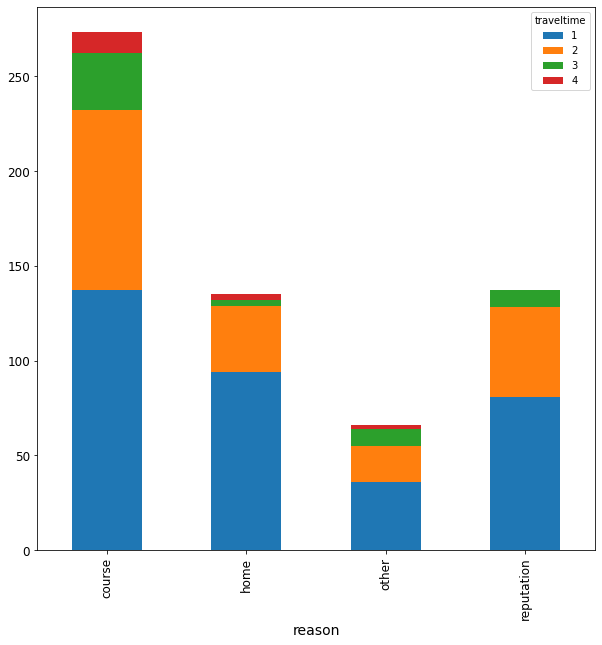

In [24]:
# To outline the relation between the reason for choosing the school v/s the travel time
pd.crosstab(data4['reason'],data4['traveltime']).plot.bar(stacked=True, figsize=(10,10))

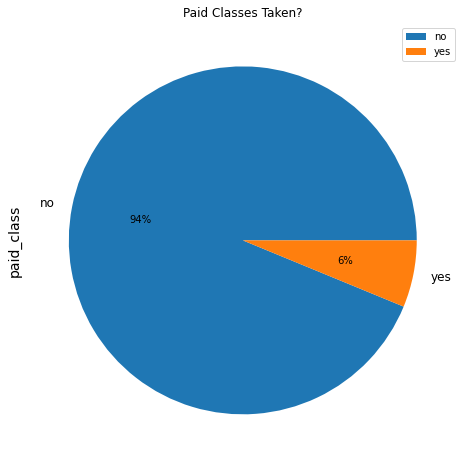

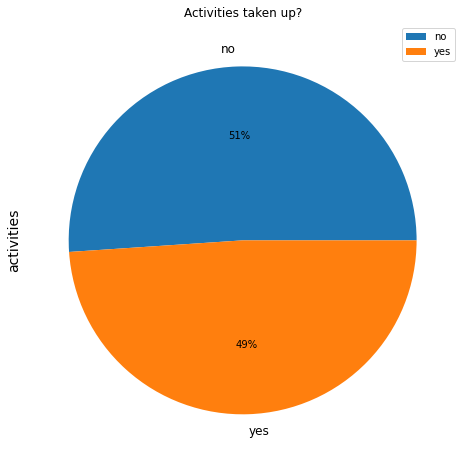

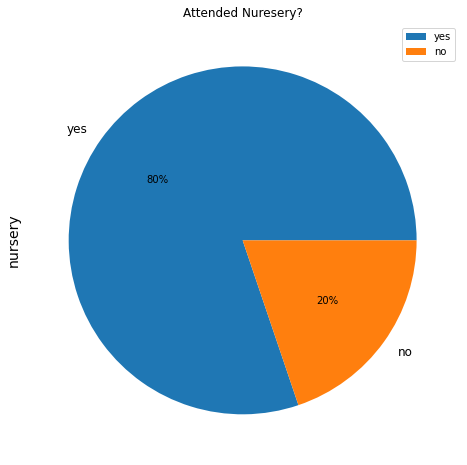

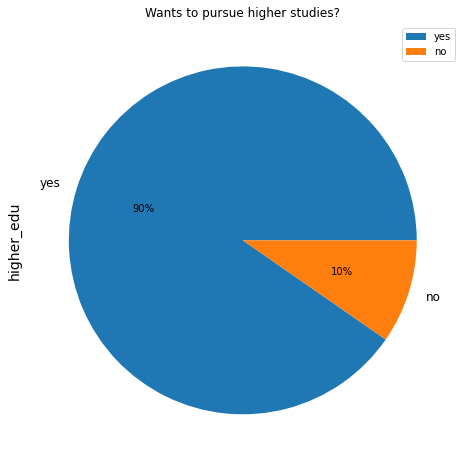

In [25]:
# To have pie charts with some attributes taking binary values
# paid classes for Math or Portuguese
plt.figure(figsize=(10, 8))
data4.paid_class.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Paid Classes Taken?')
plt.legend()

# takes part in other activities 
plt.figure(figsize=(10, 8))
data4.activities.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Activities taken up?')
plt.legend()

# attended nursery school (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.nursery.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Attended Nuresery?')
plt.legend()

# higher - wants to take higher education (binary: yes or no)
plt.figure(figsize=(10, 8))
data4.higher_edu.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wants to pursue higher studies?')
plt.legend()


In [26]:
# counts the occurences of values of each unique value in the column 'internet'- has access to or not
print(data4['internet'].value_counts())

# counts the occurences of values of each unique value in the column 'romantic_relations'- if they are in a romantic relationship or not
print(data4['romantic_relations'].value_counts())

# counts the occurences of values of each unique value in the column 'outings'- frequency of going out with friends
print(data4['outings'].value_counts())

yes    469
no     142
Name: internet, dtype: int64
no     392
yes    219
Name: romantic_relations, dtype: int64
3    196
2    140
4    133
5    100
1     42
Name: outings, dtype: int64


<AxesSubplot:xlabel='weekend_alcohol'>

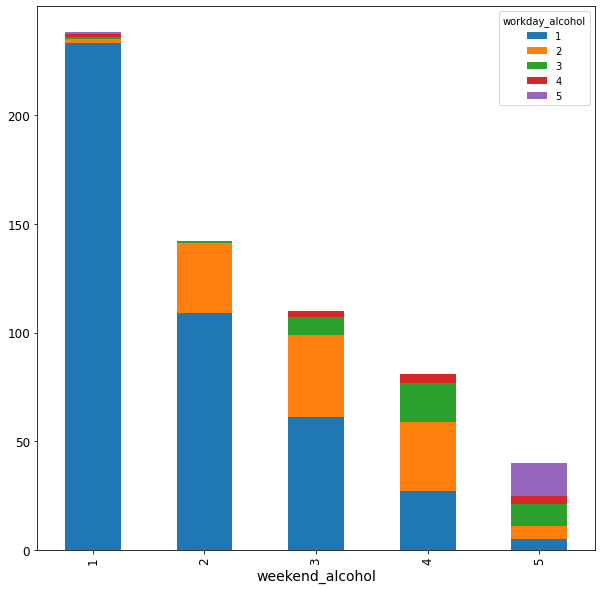

In [27]:
# To showcase the weekday and weekend alcohol consumption
pd.crosstab(data4['weekend_alcohol'],data4['workday_alcohol']).plot.bar(stacked=True, figsize=(10,10))

<AxesSubplot:xlabel='absences', ylabel='G3'>

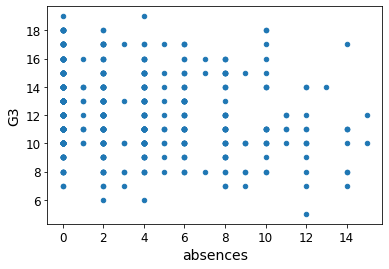

In [28]:
# To find a possible relationship between absences and final grade, before calculating the correlation matrix
data4.plot(kind="scatter", x="absences", y="G3")

## Feature Engineering

In [29]:
data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade
data4.head()

C:\Users\geeta\AppData\Local\Temp\ipykernel_17548\3837693695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['avg_grade'] = (data4['G1']+data4['G2']+data4['G3'])/3 # to add an extra attribute- the average final grade


,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,outings,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3,zscore,avg_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,-0.345841,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,-0.012481,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,0.654237,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,0.320878,12.333333
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,6,12,12,13,0.320878,12.333333


In [30]:
data4.sort_values(by=['avg_grade'])
bin_labels_5 = ['E', 'D', 'C', 'B', 'A']
data4['final_grade'] = pd.cut(x = data4['avg_grade'],
                              bins=[0, 11, 13, 15, 17, 20],
                              labels=bin_labels_5)
data4.head()

C:\Users\geeta\AppData\Local\Temp\ipykernel_17548\2023745238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['final_grade'] = pd.cut(x = data4['avg_grade'],


,school,sex,age,address,fam_size,parent_status,mom_edu,dad_edu,mom_job,dad_job,...,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3,zscore,avg_grade,final_grade
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,-0.345841,10.333333,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,-0.012481,12.333333,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,0.654237,14.000000,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,0.320878,12.333333,D
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,6,12,12,13,0.320878,12.333333,D


## Correlations

In [31]:
data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations

C:\Users\geeta\AppData\Local\Temp\ipykernel_17548\1468635189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.drop(['zscore'], axis = 1, inplace = True) # dropping the z-scores calculated earlier before finding any correlations


In [38]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# df = data4.select_dtypes(include=numerics)
# df.columns

# df["parent_edu"] = (df['mom_edu']+df['dad_edu'])/2 # to add an extra attribute
# df["alcohol_consump"] = (df['workday_alcohol']+df['weekend_alcohol'])/2 # to add an extra attribute

In [40]:
columns = data4.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
data4[columns] = ordinal_encoder.fit_transform(data4[columns])

C:\Users\geeta\AppData\Local\Temp\ipykernel_17548\3492055340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4[columns] = ordinal_encoder.fit_transform(data4[columns])


In [42]:
data4.head()
df = data4.copy()

In [ ]:
df.drop(['G1','G2','G3','avg_grade'], axis = 1, inplace = True)
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)


In [ ]:
df.index = data4.index
df['final_grade'] = data4['final_grade']
df.head()

In [ ]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['A'],1)
df1['final_grade'] = df1['final_grade'].replace(['B', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [ ]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['B'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [ ]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['C'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'B', 'D', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [ ]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['D'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'B', 'E'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
# df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [ ]:
df1 = df.copy()
df1['final_grade'] = df1['final_grade'].replace(['E'],1)
df1['final_grade'] = df1['final_grade'].replace(['A', 'C', 'D', 'B'],0)
df1['final_grade'] = df1['final_grade'].astype(float)
df1.head()

corr_matrix = df1.corr()
corr_matrix["final_grade"].sort_values(ascending = False)

In [ ]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df1.corr(), cmap = "RdYlGn_r", annot = True, fmt = '.2f')

In [ ]:
df_2 = df[['studytime','mom_edu','dad_edu','fam_relations','failures','workday_alcohol']]
df_2.head()

In [ ]:
df_5 = df[['studytime','mom_edu','dad_edu','age','weekend_alcohol','workday_alcohol','outings','freetime','health','failures']]
df_5.head()

In [ ]:
df_10 = df[['final_grade','studytime','mom_edu','age','dad_edu','health','fam_relations','workday_alcohol','weekend_alcohol','outings','freetime','traveltime','absences','failures']]
df_10.head()

## Prepare Data for Classifier

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# 1. Use entire data set
new_df = data4 
#reference: https://www.kaggle.com/code/scratchpad/notebooke88af56e04/edit


binary_columns = ['school', 'sex', 'address', 'fam_size', 'parent_status', 'school_support', 'fam_support',
       'paid_class', 'activities', 'nursery', 'higher_edu', 'internet', 'romantic_relations']
nominal_columns = ['mom_job', 'dad_job', 'reason', 'guardian']

transformers = [('numerical', StandardScaler(), ['age','absences']), ('nominal', OneHotEncoder(), nominal_columns),
               ('binary', OrdinalEncoder(), binary_columns)]
transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')
new_df = pd.DataFrame(transformer_pipeline.fit_transform(new_df))

le = LabelEncoder()

new_df[47] = le.fit_transform(new_df[47]) #final grade column 

new_X = new_df.drop(columns=[47])

new_Y = new_df[47]
new_X, new_Y

In [ ]:
from sklearn.model_selection import train_test_split

# create a test - train split
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_X, new_Y, test_size=0.20)

## Training the Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# train KNN classifier

new_model = KNeighborsClassifier()
new_model.fit(new_X_train, new_Y_train)

In [ ]:
# check model accuracy
print(new_model.score(new_X_train, new_Y_train))
print(new_model.score(new_X_test, new_Y_test))